Importing the libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

# Data Gathering
- this dataset is taken from [kaggle](https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand)

## Dataset summarry
This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things.

## Column Description
- hotel: name of the hotel
- is_canceld: Value indicating if the booking was canceled (1) or not (0)
- lead_time: Number of days that elapsed between the entering date of the booking into the PMS and the arrival date
- arrival_date_year: Year of arrival date

Loading the dataset

In [ ]:
df=pd.read_csv('hotel_booking.csv')

# Creating a copy
- Making a copy of a dataset before data cleaning is done to preserve the original data in its raw form. This ensures that any changes made during the data cleaning process do not affect the original dataset

In [ ]:
df_copy=df.copy()

In [ ]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card'],
      dtype='object')

# Explorig and Cleaning Data

## unclean data

1. Removing 'name', 'email', 'phone-number' and  'credit_card' columns: this contain personal information which is not need for analysis
2. reservation_status_date: is given as an object datatype --> convert it to datetime datatype
3. removing 'agent', 'company' columns: not needed
4. removing missing values from country and adults: very low missing values --> we can simply delete those

Checking for incorrect datatype

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

checking for null values

In [ ]:
df.isnull().sum()
#lot of missing values in agent and company
#those columns are not needed therefor we will delete those

#country and adults: very low missing values --> we can simply delete those

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

###1. Removing 'name', 'email', 'phone-number' and 'credit_card' 

In [ ]:
#1. Removing 'name', 'email', 'phone-number' and 'credit_card' 

#define: remove columns using drop()
#code
df.drop(['name', 'email', 'phone-number', 'credit_card'], axis=1, inplace=True)

In [ ]:
#test
df.columns

#'name', 'email', 'phone-number' and 'credit_card' are removed

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

###2. convert reservation_status_date to datetime datatype

In [ ]:
#2. convert reservation_status_date to datetime datatyoe

#check: dtype is object 
df['reservation_status_date']

0         2015-07-01
1         2015-07-01
2         2015-07-02
3         2015-07-02
4         2015-07-03
             ...    
119385    2017-09-06
119386    2017-09-07
119387    2017-09-07
119388    2017-09-07
119389    2017-09-07
Name: reservation_status_date, Length: 119390, dtype: object

In [ ]:
#code
df['reservation_status_date']=pd.to_datetime(df['reservation_status_date'])

In [ ]:
#test: reservation_status_date is converted to datetime
df['reservation_status_date']

0        2015-07-01
1        2015-07-01
2        2015-07-02
3        2015-07-02
4        2015-07-03
            ...    
119385   2017-09-06
119386   2017-09-07
119387   2017-09-07
119388   2017-09-07
119389   2017-09-07
Name: reservation_status_date, Length: 119390, dtype: datetime64[ns]

### 3. removing columns 'agent', 'company'

In [ ]:
#3. removing columns 'agent', 'company'
df.drop(['agent','company'], axis=1, inplace=True)

In [ ]:
#test: agent and company columns removed
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

### 4. removing missing values from country and children

In [ ]:
# 4. removing missing values from country and children
#check
df['country'].isnull().sum()

488

In [ ]:
df['children'].isnull().sum()

4

In [ ]:
#code
df.dropna(inplace=True)

In [ ]:
#test
df['country'].isnull().sum()

0

In [ ]:
df['children'].isnull().sum()

0

In [ ]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,A,0,No Deposit,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,E,0,No Deposit,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,D,0,No Deposit,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,A,0,No Deposit,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,A,0,No Deposit,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [ ]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
df.shape

(118898, 30)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 118898 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           118898 non-null  object        
 1   is_canceled                     118898 non-null  int64         
 2   lead_time                       118898 non-null  int64         
 3   arrival_date_year               118898 non-null  int64         
 4   arrival_date_month              118898 non-null  object        
 5   arrival_date_week_number        118898 non-null  int64         
 6   arrival_date_day_of_month       118898 non-null  int64         
 7   stays_in_weekend_nights         118898 non-null  int64         
 8   stays_in_week_nights            118898 non-null  int64         
 9   adults                          118898 non-null  int64         
 10  children                        118898 non-null  float64

In [ ]:
df.describe(include='object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,118898,118898,118898,118898,118898,118898,118898,118898,118898,118898,118898
unique,2,12,5,177,7,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79302,13852,91863,48586,56402,97730,85601,73863,104163,89174,74745


checking unique values of categroical columns

In [ ]:
for col in df.describe(include='object').columns:
  print(col)
 
  print(df[col].unique())
  print('-'*100)

hotel
['Resort Hotel' 'City Hotel']
----------------------------------------------------------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
----------------------------------------------------------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
----------------------------------------------------------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' 'ROU' 'NOR' 'OMN' 'ARG' 'POL' 'DEU'
 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST' 'CZE'
 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR' 'UKR'
 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO' 'ISR'
 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM' 'HRV'
 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY' 'KWT'
 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'I

Checking summary of numerical columns

## removig outliers

In [ ]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


<Axes: >

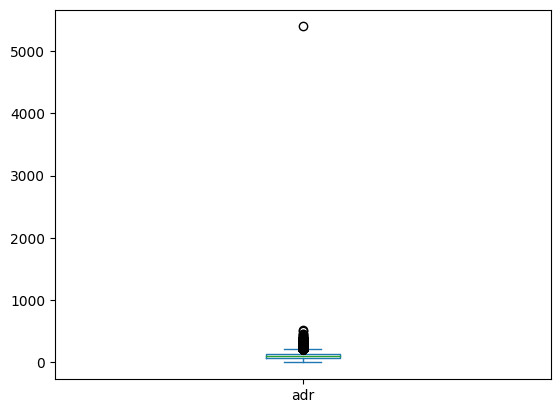

In [ ]:
#adr 
df['adr'].plot(kind='box')

In [ ]:
df=df[df['adr']<5000]

# Exploratory data analysis

## amount of reservation that is cancelled

In [ ]:
cancelled_perc=df['is_canceled'].value_counts(normalize=True)*100
cancelled_perc



0    62.865337
1    37.134663
Name: is_canceled, dtype: float64

37% is high value for cancelled reservatios

<BarContainer object of 2 artists>

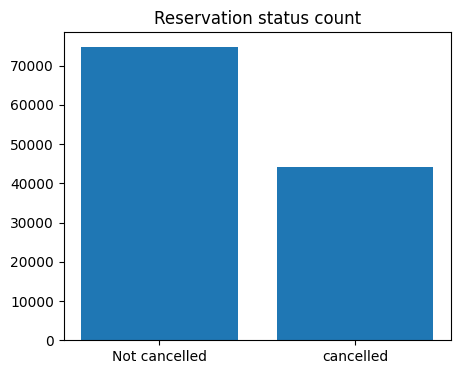

In [ ]:
plt.figure(figsize=(5,4))
plt.title('Reservation status count')
plt.bar(['Not cancelled','cancelled'],df['is_canceled'].value_counts())


## cancelation rate hotel wise

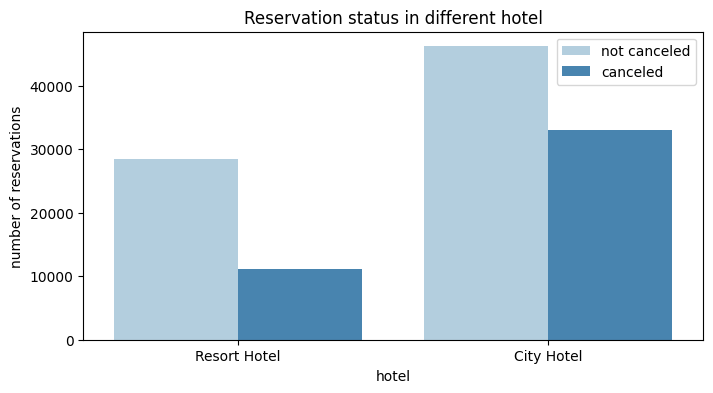

In [ ]:
plt.figure(figsize=(8,4))
ax1=sns.countplot(x='hotel', hue='is_canceled', data=df, palette='Blues')
plt.title('Reservation status in different hotel')
plt.xlabel('hotel')
plt.ylabel('number of reservations')
plt.legend(['not canceled','canceled'])
plt.show()

Resort hotel has large number of cancelation compare to Resort hotel.

### Assumption
- city hotel has more booking because it is cheaper than resort hotel

- price or maintanence may be cause of high cancelation rates

## percentage of reserveation cancelled

In [ ]:
resort_hotel=df.query('hotel=="Resort Hotel"')
resort_hotel['is_canceled'].value_counts(normalize=True)

0    0.72025
1    0.27975
Name: is_canceled, dtype: float64

In [ ]:
city_hotel=df.query('hotel=="City Hotel"')
city_hotel['is_canceled'].value_counts(normalize=True)

0    0.582918
1    0.417082
Name: is_canceled, dtype: float64

around 42% of reservations are getting canceled in City Hotel which is a very high number

## Does price affect cancelation

- comparing mean of average daily rate of both hotels

In [ ]:
resort_hotel_mean=resort_hotel.groupby('reservation_status_date')[['adr']].mean()
city_hotel_mean=city_hotel.groupby('reservation_status_date')[['adr']].mean()

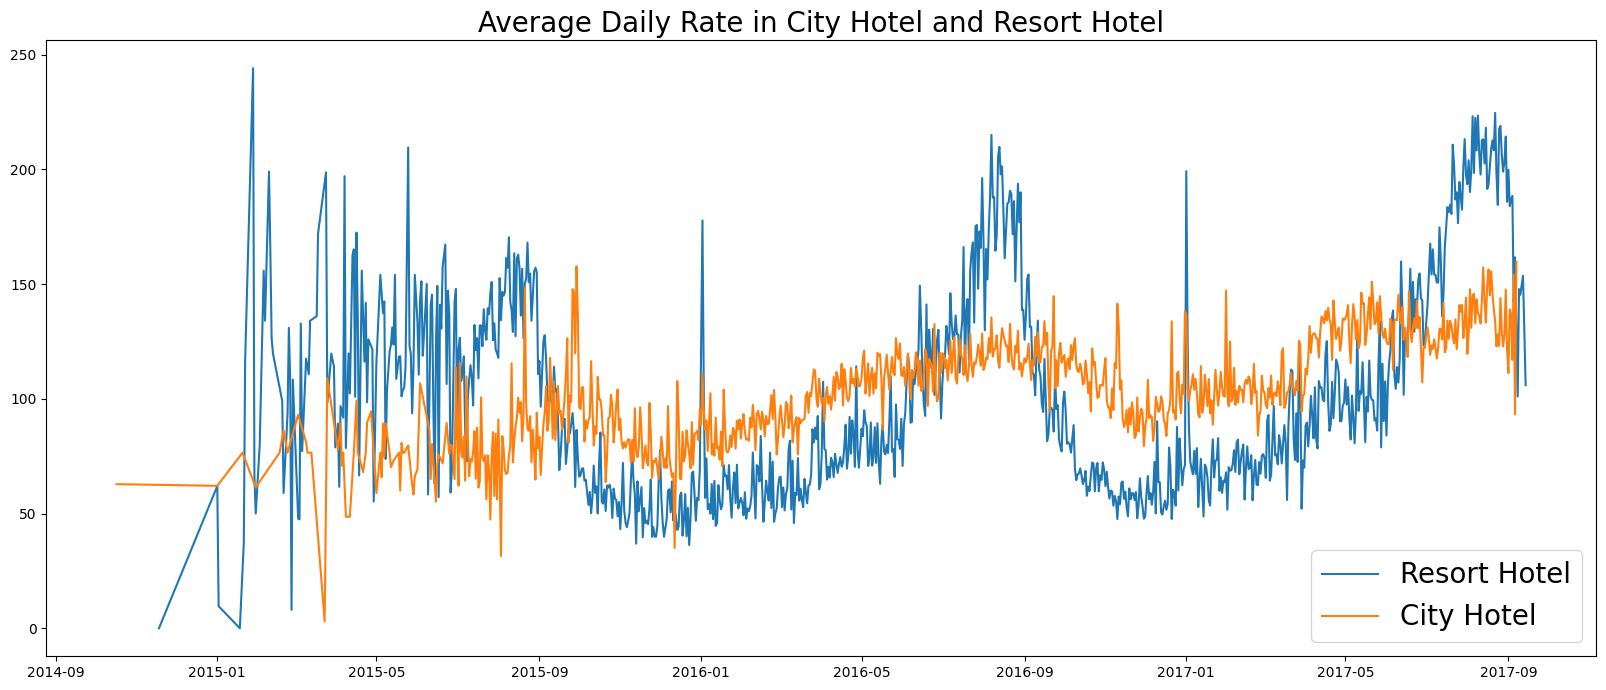

In [ ]:
plt.figure(figsize=(20,8))
plt.title('Average Daily Rate in City Hotel and Resort Hotel',fontdict={'fontsize': 20})
plt.plot(resort_hotel_mean.index, resort_hotel_mean['adr'], label='Resort Hotel')
plt.plot(city_hotel_mean.index, city_hotel_mean['adr'], label='City Hotel')
plt.legend(fontsize=20)
plt.show()

Spikes in the graph represets the high prices during the weekend or holidays. This graph proves the hypothesis that city hotels price are higher than Resort hotel price for most days. while there are some times were resort hotel price are escaleted
 



## month wise cancelation

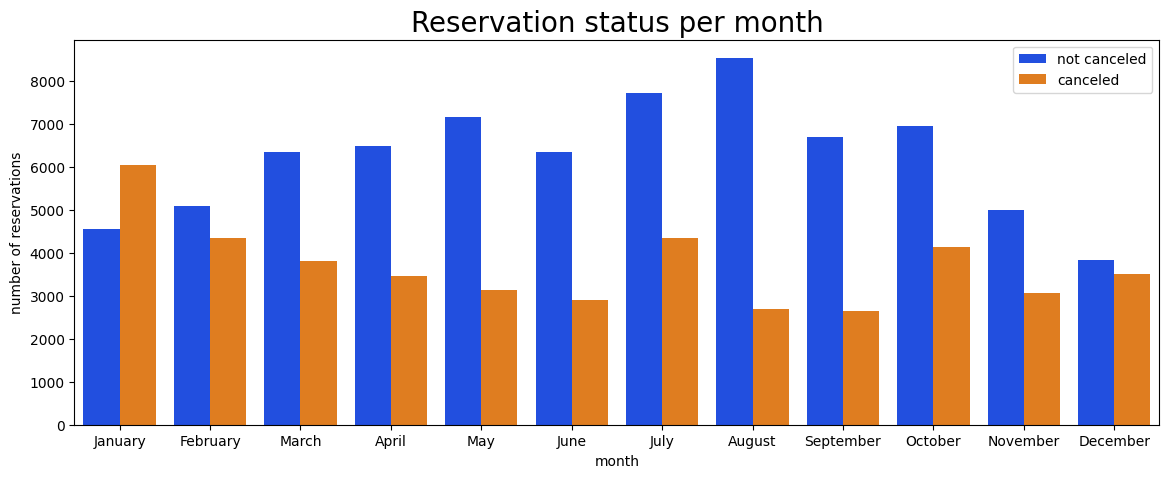

In [ ]:
df['month']=df['reservation_status_date'].dt.month
plt.figure(figsize=(14,5))
ax1=sns.countplot(x='month',hue='is_canceled',data=df, palette='bright')

plt.title('Reservation status per month',fontdict={'fontsize': 20})
plt.xlabel('month')
plt.ylabel('number of reservations')
plt.legend(['not canceled', 'canceled'])
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
          'August', 'September', 'October', 'November', 'December']
ax1.set_xticklabels(months)
plt.show()

- maximum number of cancellations are in the month of January and the lowest rate of cancelatios are done in the month of September and august




## Week wise reservatio cancellations

1.   List item
2.   List item



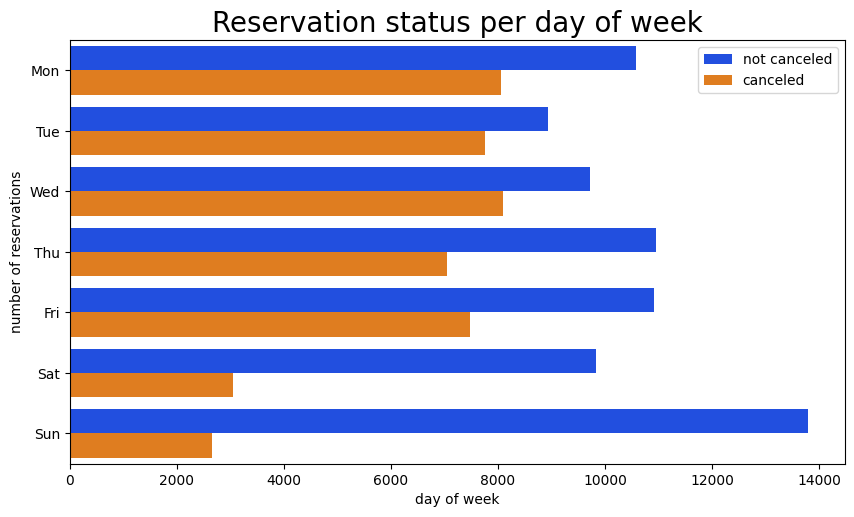

In [ ]:
df['dayofweek']=df['reservation_status_date'].dt.dayofweek
plt.figure(figsize=(10,5.5))
ax1=sns.countplot(y='dayofweek',hue='is_canceled',data=df, palette='bright')

plt.title('Reservation status per day of week',fontdict={'fontsize': 20})
plt.xlabel('day of week')
plt.ylabel('number of reservations')
plt.legend(['not canceled', 'canceled'])
dayofweek = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
ax1.set_yticklabels(dayofweek)
plt.show()

As shown in above bar graph cancelation were highest on weekdays and very minimal on weekends.

### Average daily rate of each month

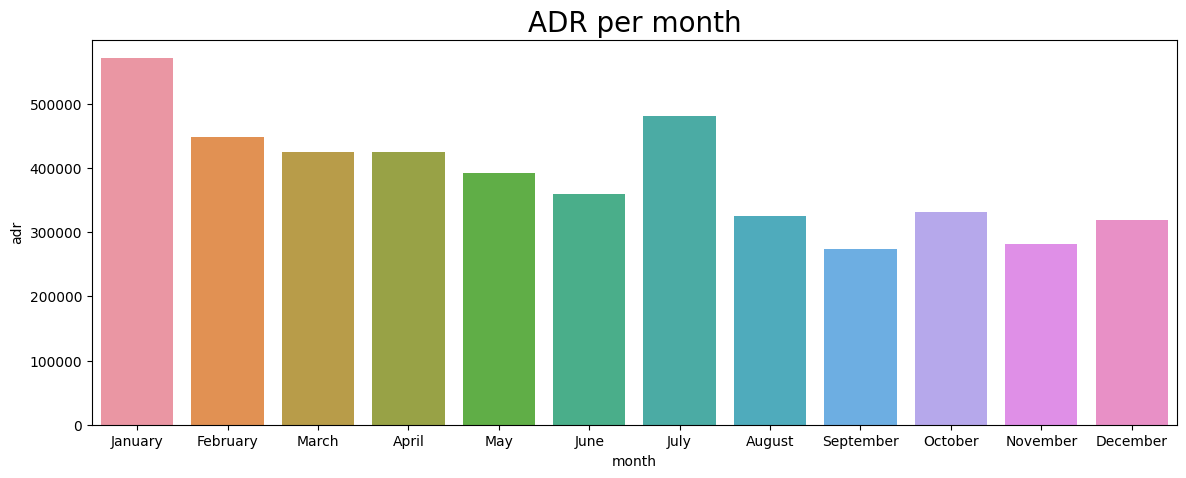

In [ ]:
plt.figure(figsize=(14,5))
plt.title('ADR per month',fontsize=20)
ax1=sns.barplot(data=df.query('is_canceled==1').groupby('month')[['adr']].sum().reset_index(),x='month',y='adr')
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
          'August', 'September', 'October', 'November', 'December']
ax1.set_xticklabels(months)
plt.show()

### Checkig assumtion: 
months with lowest cancelation rates have lowest prices and months with highest cancellation has highest prices: true

- January: highest prices also has highest cancellatios
- September: lowest prices also has lowest cancellatios


## cancelation rate based on Country

- checkig only top 10 countries as we have data of 100s countries which will be difficult to analyze.

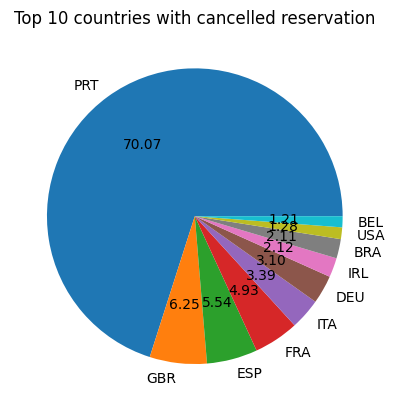

In [ ]:
cancelation_data=df.query('is_canceled==1')
top_10_countries=cancelation_data['country'].value_counts().head(10)
plt.title('Top 10 countries with cancelled reservation')
plt.pie(top_10_countries,autopct='%.2f',labels=top_10_countries.index)
plt.show()

Portugle has maximum cancelation out of all countries

Advice 
- increase facilites in hotels situated in Protugle, lower the Prices, give promotional discounts, run campines, increase advertisements to decrease the cancellatios

## Reservation marker segment

In [ ]:
df['market_segment'].value_counts()

Online TA        56402
Offline TA/TO    24159
Groups           19806
Direct           12448
Corporate         5111
Complementary      734
Aviation           237
Name: market_segment, dtype: int64

In [ ]:
df['market_segment'].value_counts(normalize=True)

Online TA        0.474377
Offline TA/TO    0.203193
Groups           0.166581
Direct           0.104696
Corporate        0.042987
Complementary    0.006173
Aviation         0.001993
Name: market_segment, dtype: float64

47% booking is coming from customers who book online

### which Market segment has the highest cancelation 

In [ ]:
market_segment_distribution=cancelation_data['market_segment'].value_counts(normalize=True)
market_segment_distribution

Online TA        0.469696
Groups           0.273985
Offline TA/TO    0.187466
Direct           0.043486
Corporate        0.022151
Complementary    0.002038
Aviation         0.001178
Name: market_segment, dtype: float64

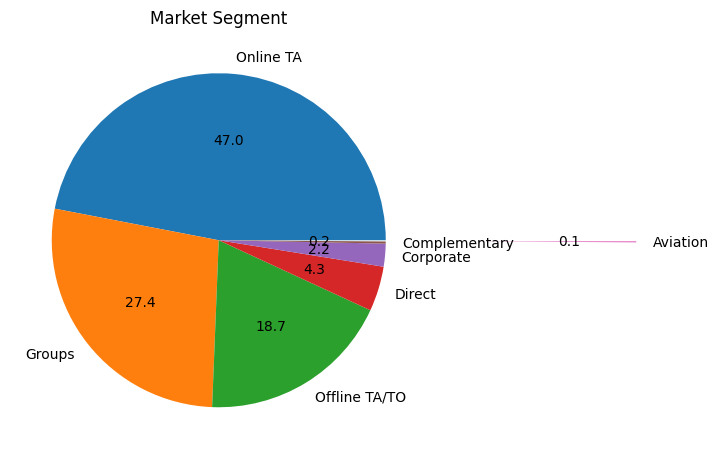

In [ ]:
plt.title('Market Segment')
plt.pie(market_segment_distribution,autopct='%.1f',labels=market_segment_distribution.index,explode=(0, 0, 0, 0, 0,0, 1.5))
plt.tight_layout()
plt.show()

around 47% cancelation is done by customers who book online

## does canceled bookings have high adr?

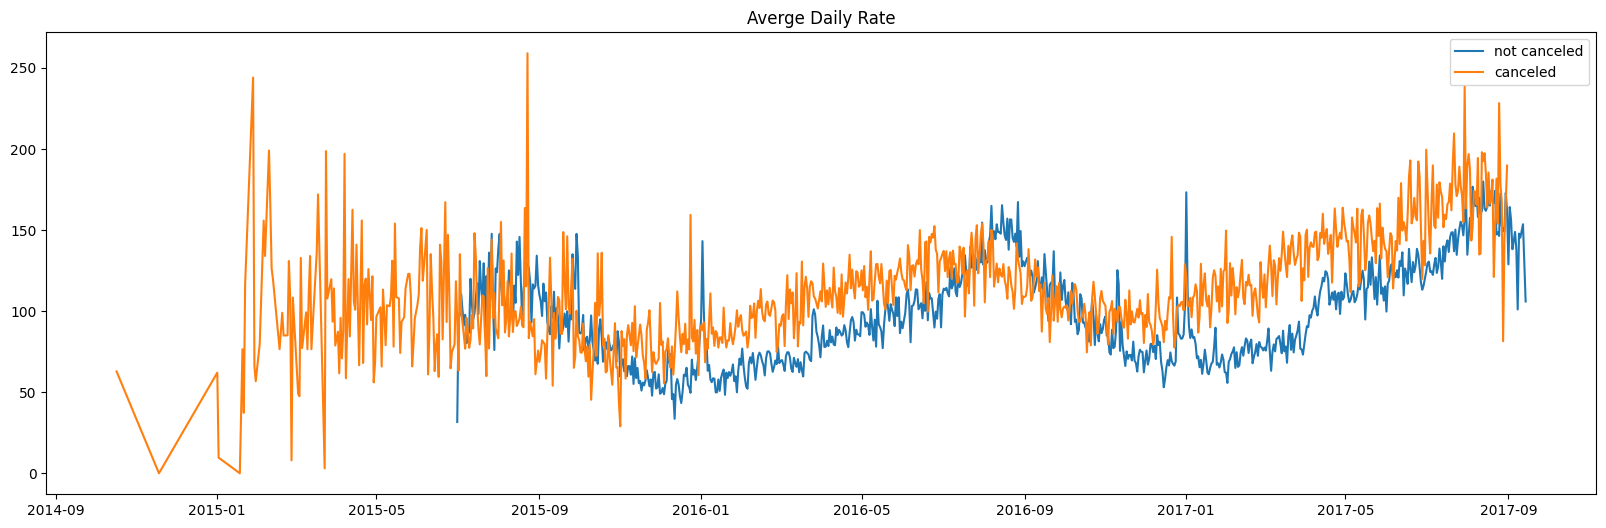

In [ ]:
non_canceled_data=df.query('is_canceled==1')
cancelation_df_adr=cancelation_data.groupby('reservation_status_date')[['adr']].mean()
cancelation_df_adr.reset_index(inplace=True)
cancelation_df_adr.sort_values('reservation_status_date',inplace=True)

non_canceled_data=df.query('is_canceled==0')
non_canceled_df_adr=non_canceled_data.groupby('reservation_status_date')[['adr']].mean()
non_canceled_df_adr.reset_index(inplace=True)
non_canceled_df_adr.sort_values('reservation_status_date',inplace=True)

plt.figure(figsize=(20,6))
plt.title('Averge Daily Rate')
plt.plot(non_canceled_df_adr['reservation_status_date'],non_canceled_df_adr['adr'],label='not canceled')
plt.plot(cancelation_df_adr['reservation_status_date'],cancelation_df_adr['adr'],label='canceled')
plt.legend()
plt.show()

checking data from 2016 till end

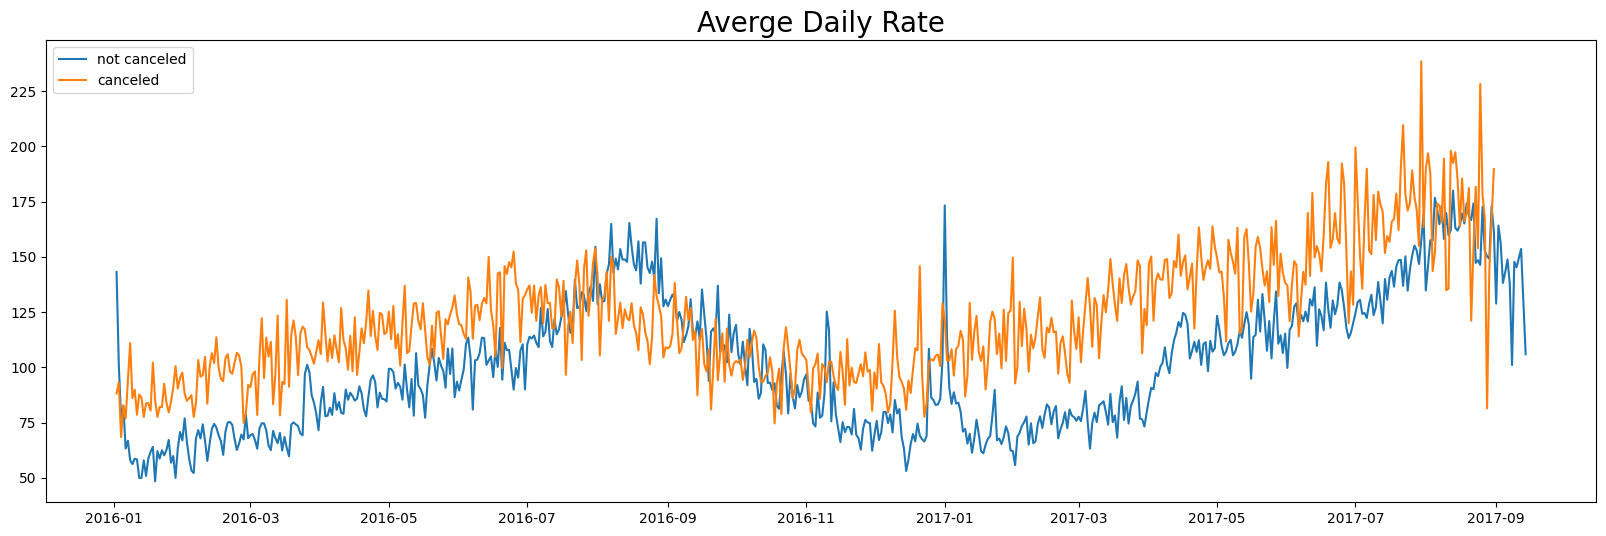

In [ ]:
cancelation_df_adr=cancelation_df_adr.query('reservation_status_date>"2016"')
non_canceled_df_adr=non_canceled_df_adr.query('reservation_status_date>"2016"')

plt.figure(figsize=(20,6))
plt.title('Averge Daily Rate',fontdict={'fontsize':20})
plt.plot(non_canceled_df_adr['reservation_status_date'],non_canceled_df_adr['adr'],label='not canceled')
plt.plot(cancelation_df_adr['reservation_status_date'],cancelation_df_adr['adr'],label='canceled')
plt.legend()
plt.show() 

we can see mostly non cancelled bookings have low price than the cancelled ones. 